### 데이터프레임 합치기 (merge, join, concat)

#### pd.concat()

데이터프레임을 물리적으러 이어 붙여주는 함수이다. 

pd.concat(데이터프레임리스트)

In [1]:
import pandas as pd

df1 = pd.DataFrame({'a':['a0','a1','a2','a3'],
                   'b':['b0','b1','b2','b3'],
                   'c':['c0','c1','c2','c3']},
                  index = [0,1,2,3])

df2 = pd.DataFrame({'a':['a2','a3','a4','a5'],
                   'b':['b2','b3','b4','b5'],
                   'c':['c2','c3','c4','c5'],
                   'd':['d2','d3','d4','d5']},
                   index = [2,3,4,5])

print(df1, '\n')
print(df2)

    a   b   c
0  a0  b0  c0
1  a1  b1  c1
2  a2  b2  c2
3  a3  b3  c3 

    a   b   c   d
2  a2  b2  c2  d2
3  a3  b3  c3  d3
4  a4  b4  c4  d4
5  a5  b5  c5  d5


In [4]:
result1 = pd.concat([df1, df2]) #행방향으로 붙이기
result2 = pd.concat([df1, df2], axis = 1) # 열방향으로 붙이기

print(result1, '\n')
print(result2)

    a   b   c    d
0  a0  b0  c0  NaN
1  a1  b1  c1  NaN
2  a2  b2  c2  NaN
3  a3  b3  c3  NaN
2  a2  b2  c2   d2
3  a3  b3  c3   d3
4  a4  b4  c4   d4
5  a5  b5  c5   d5 

     a    b    c    a    b    c    d
0   a0   b0   c0  NaN  NaN  NaN  NaN
1   a1   b1   c1  NaN  NaN  NaN  NaN
2   a2   b2   c2   a2   b2   c2   d2
3   a3   b3   c3   a3   b3   c3   d3
4  NaN  NaN  NaN   a4   b4   c4   d4
5  NaN  NaN  NaN   a5   b5   c5   d5


concat 함수는 이어붙이는 방식을 결정할 수 있다. 합집합을 사용할 것인가? 교집합을 사용할 것인가?  
기본값이 합집합으로 `join = 'outer'`가 설정되어 있지만 교집합을 사용하기 위해서는 `join = 'inner'`를 설정해야한다. 

In [5]:
result3 = pd.concat([df1,df2], axis = 1, join = 'inner')
result3

,a,b,c,a,b,c,d
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3


#### merge() 

두 데이터프레임을 각 데이터에 존재하는 고유값을 기준으로 병합할 때 사용한다.   
`pd.merge(df_left, df_right, how='inner', on=None)`이 default이다.

In [12]:
import pandas as pd

df1 = pd.DataFrame({'a':['a0','a1','a2','a3'],
                   'b':['b0','b1','b2','b3'],
                   'c':['c0','c1','c2','c3']},
                  index = [0,1,2,3])

df2 = pd.DataFrame({'a':['a2','a3','a4','a5'],
                   'b':['b2','b3','b4','b5'],
                   'c':['c2','c3','c4','c5'],
                   'd':['d2','d3','d4','d5']},
                   index = [2,3,4,5])

print(df1, '\n')
print(df2)

    a   b   c
0  a0  b0  c0
1  a1  b1  c1
2  a2  b2  c2
3  a3  b3  c3 

    a   b   c   d
2  a2  b2  c2  d2
3  a3  b3  c3  d3
4  a4  b4  c4  d4
5  a5  b5  c5  d5


아무 옵션을 넣지 않았기 때문에 첫열의 값을 기준으로 교집합 조인을 함.

In [13]:
merge_inner = pd.merge(df1, df2)
merge_inner

,a,b,c,d
0,a2,b2,c2,d2
1,a3,b3,c3,d3


- outer 옵션을 주어 합집합으로 구하고 b열을 기준으로 합치되, 데이터가 없는 경우 NaN 저장

In [14]:
merge_out = pd.merge(df1, df2, how = 'outer', on = 'b')
merge_out

,a_x,b,c_x,a_y,c_y,d
0,a0,b0,c0,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN
2,a2,b2,c2,a2,c2,d2
3,a3,b3,c3,a3,c3,d3
4,NaN,b4,NaN,a4,c4,d4
5,NaN,b5,NaN,a5,c5,d5


만약 병합하려는 두 프레임의 기준 열 이름이 다르다면 left_on, right_on 옵션을 넣아야한다. 

코드 구현을 해보니까 완벽히 left 조인이었다. 
왼쪽 집합을 놔둔 채 오른쪽 집합은 교집합 된 것만 출력한다. 

- 참고사항

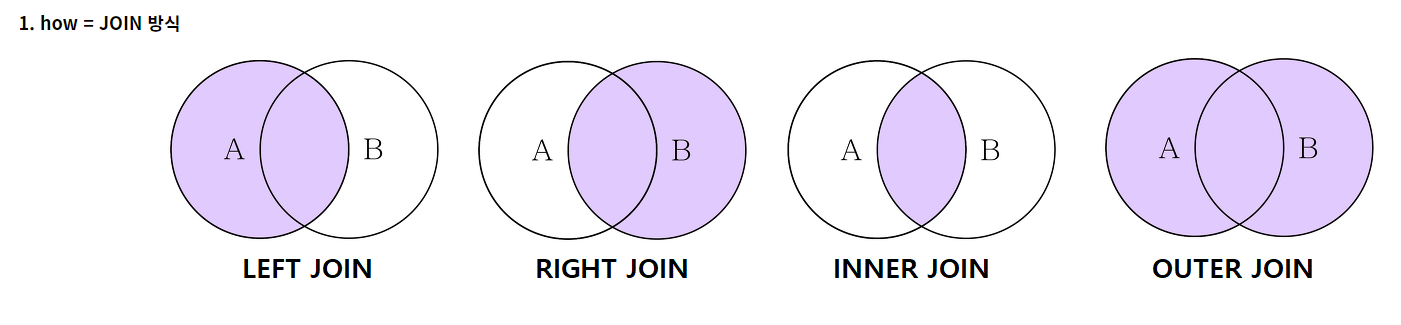

In [16]:
merge_left = pd.merge(df1,df2, how='left', left_on='b', right_on='b')
merge_left

,a_x,b,c_x,a_y,c_y,d
0,a0,b0,c0,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN
2,a2,b2,c2,a2,c2,d2
3,a3,b3,c3,a3,c3,d3


right도 위와 동일